##Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from numpy import percentile
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',250)

In [ ]:
gdata = pd.read_csv("/content/sample_data_upwork_test.csv")
gdata = gdata.iloc[: , 1:]
gdata.head()

,CARRIER_RATE,DELIVERY_DAYS,ShipmentWeight,ShipFromCity,ShipFromCountry,ShipToCity,ShipToCountry,distance
0,5100.0,0.0,20410.0,CAVA DEI TIRRENI (SALERNO),IT,MASSA,IT,628.63
1,32000.0,10.0,75400.0,MODUGNO-BARI,IT,AVENZA,IT,791.64
2,52500.0,10.0,75400.0,MODUGNO-BARI,IT,AVENZA,IT,791.64
3,150.0,2.0,270.5,BORGO A MOZZANO (LU),IT,COLLESALVETTI (LI),IT,71.15
4,209.0,2.0,270.5,BORGO A MOZZANO (LU),IT,COLLESALVETTI (LI),IT,71.15


##EDA

In [ ]:
gdata.head(0)

,CARRIER_RATE,DELIVERY_DAYS,ShipmentWeight,ShipFromCity,ShipFromCountry,ShipToCity,ShipToCountry,distance


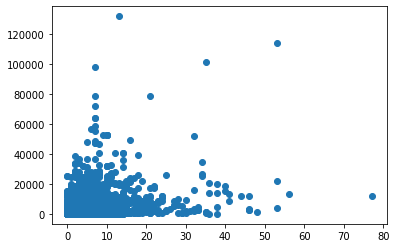

In [ ]:
plt.scatter(x = gdata['DELIVERY_DAYS'],y = gdata['CARRIER_RATE'])

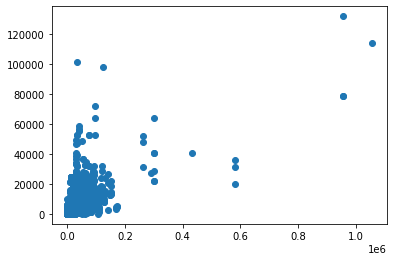

In [ ]:
plt.scatter(x = gdata['ShipmentWeight'],y = gdata['CARRIER_RATE'])

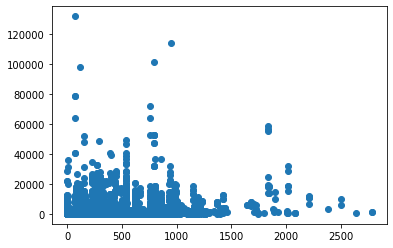

In [ ]:
plt.scatter(x = gdata['distance'],y = gdata['CARRIER_RATE'])

##Rename

In [ ]:
gdata = gdata.rename(columns={'CARRIER_RATE':'CarrierRate','DELIVERY_DAYS':'DeliveryDays','distance':'Distance'})

In [ ]:
gdata = gdata[['CarrierRate','DeliveryDays','Distance','ShipmentWeight','ShipFromCity','ShipToCity', 'ShipFromCountry', 'ShipToCountry']]
gdata.head(1)

,CarrierRate,DeliveryDays,Distance,ShipmentWeight,ShipFromCity,ShipToCity,ShipFromCountry,ShipToCountry
0,5100.0,0.0,628.63,20410.0,CAVA DEI TIRRENI (SALERNO),MASSA,IT,IT


In [ ]:
gdata.dtypes

CarrierRate        float64
DeliveryDays       float64
Distance           float64
ShipmentWeight     float64
ShipFromCity        object
ShipToCity          object
ShipFromCountry     object
ShipToCountry       object
dtype: object

In [ ]:
# gdata["ID"] = pd.to_numeric(gdata["ID"])

##Dummies

In [ ]:
# pip install --upgrade category_encoders

In [ ]:
# from sklearn import preprocessing
# le=preprocessing.LabelEncoder()

In [ ]:
# le.fit(gdata['ShipFromCity'].unique())
# gdata.ShipFromCity=le.transform(gdata.ShipFromCity)
# le.fit(gdata['ShipToCity'].unique())
# gdata.ShipToCity=le.transform(gdata.ShipToCity)
# le.fit(gdata['ShipFromCountry'].unique())
# gdata.ShipFromCountry=le.transform(gdata.ShipFromCountry)
# le.fit(gdata['ShipToCountry'].unique())
# gdata.ShipToCountry=le.transform(gdata.ShipToCountry)

In [ ]:
gdata=gdata.dropna()

In [ ]:
gdata.head(1)

,CarrierRate,DeliveryDays,Distance,ShipmentWeight,ShipFromCity,ShipToCity,ShipFromCountry,ShipToCountry
0,5100.0,0.0,628.63,20410.0,CAVA DEI TIRRENI (SALERNO),MASSA,IT,IT


In [ ]:
# from category_encoders import TargetEncoder
# encoder = TargetEncoder()
# gdata['ShipFromCity'] = encoder.fit_transform(gdata['ShipFromCity'], gdata['CarrierRate'])

In [ ]:
# from category_encoders import TargetEncoder
# encoder = TargetEncoder()
# gdata['ShipToCity'] = encoder.fit_transform(gdata['ShipToCity'], gdata['CarrierRate'])

In [ ]:
# from category_encoders import TargetEncoder
# encoder = TargetEncoder()
# gdata['ShipFromCountry'] = encoder.fit_transform(gdata['ShipFromCountry'], gdata['CarrierRate'])

In [ ]:
# from category_encoders import TargetEncoder
# encoder = TargetEncoder()
# gdata['ShipToCountry'] = encoder.fit_transform(gdata['ShipToCountry'], gdata['CarrierRate'])

I have tried several techniques for encoding, seems like model works best with dummies

In [ ]:
gdata = pd.get_dummies(data=gdata,columns=['ShipFromCity','ShipToCity', 'ShipToCountry', 'ShipFromCountry'])
gdata.head()

,CarrierRate,DeliveryDays,Distance,ShipmentWeight,ShipFromCity_50127,ShipFromCity_84060 / OMIGNANO SCALO (SA),ShipFromCity_ADRO,ShipFromCity_AGLIANA,ShipFromCity_AGRATE BRIANZA,ShipFromCity_AGRATE BRIANZA MB,ShipFromCity_ALBANO S. ALESSANDRO,ShipFromCity_ALBANO SANT'ALESSANDRO,ShipFromCity_ALBANO SANT'ALESSIO,ShipFromCity_ALBAVILLA (CO),ShipFromCity_ALBERONE DI CENTO,ShipFromCity_ALBIANO MAGRA,ShipFromCity_ALBIANO MAGRA (MASSA),ShipFromCity_ALBIANO MAGRA (MS),ShipFromCity_ALBIGNASEGO,ShipFromCity_ALBINIA,ShipFromCity_ALCESTER WARWICK,ShipFromCity_ALMENNO SAN SALVATORE,ShipFromCity_ALMENNO SAN SALVATORE (BG),ShipFromCity_ALMISANO DI LONIGO VI,ShipFromCity_ALPIGNANO,ShipFromCity_ALPIGNANO (TO),ShipFromCity_ALPIGNANO (TO9,ShipFromCity_ALPIGNANO TORINO,ShipFromCity_ALTAVILLA VICENTINA - VI,ShipFromCity_ALZATE BRIANZA,ShipFromCity_ALZATE BRIANZA (CO),ShipFromCity_ALZATE BRIANZA (COMO),ShipFromCity_AMSTERDAM,ShipFromCity_ANCHIANO,ShipFromCity_ANCONA,ShipFromCity_ANTELLA,ShipFromCity_ANTELLA - BAGNO A RIPOLI (FI),ShipFromCity_ANTELLA BAGNO A RIPOLI FIRENZE,ShipFromCity_ARCOLA,ShipFromCity_ARCOLA (LA SPEZIA),ShipFromCity_ARCOLA SP,ShipFromCity_ARCORE,ShipFromCity_ARCORE (MI),ShipFromCity_ARESE,ShipFromCity_ARESE MI,ShipFromCity_AREZZO,ShipFromCity_ARICESTII-RAHTIVANI,ShipFromCity_ARLUNO MI,ShipFromCity_ARPAJON,ShipFromCity_ARSAGO SEPRIO (VA),ShipFromCity_ARTOGNE,ShipFromCity_ARZANO,ShipFromCity_ARZANO (NA),ShipFromCity_ARZANO NAPOLI,ShipFromCity_ARZIGNANO,ShipFromCity_ASSAGO,ShipFromCity_ASSISI,ShipFromCity_ASSISI PERUGIA,ShipFromCity_AVENZA,ShipFromCity_AVEZZANO,ShipFromCity_AVIGLIANA TO,ShipFromCity_BAD WÜNNENBERG,ShipFromCity_BADIA A SETTIMO,ShipFromCity_BAGNATICA,ShipFromCity_BAGNO A RIPOLI,ShipFromCity_BAGNO A RIPOLI (FI),ShipFromCity_BAGNO A RIPOLI FI,ShipFromCity_BARBERINO DI MUGELLO,ShipFromCity_BARBERINO TAVARNELLE,ShipFromCity_BARBERINO VAL DELSA,ShipFromCity_BARI,ShipFromCity_BASALDELLA DI CAMPFORMIO,ShipFromCity_BASALDELLA DI CAMPOFORMID,ShipFromCity_BASALDELLA DI CAMPOFORMIDO (UD,ShipFromCity_BASALUZZO,ShipFromCity_BASIANO,ShipFromCity_BASTIA DI ROVOLON,ShipFromCity_BERGAMO,ShipFromCity_BERNATE,ShipFromCity_BIANCONESE DI FONTEVIVO (PR),ShipFromCity_BIASSONO,ShipFromCity_BIASSONO MB,ShipFromCity_BIBBIENA,ShipFromCity_BIBBIENA STAZIONE,ShipFromCity_BOLOGNA,ShipFromCity_BORGO A MOZZANO,ShipFromCity_BORGO A MOZZANO (LU),ShipFromCity_BORGOMANERO,ShipFromCity_BORROMEO,ShipFromCity_BREGNANO,ShipFromCity_BRESCIA,ShipFromCity_BRINDISI,ShipFromCity_BS,ShipFromCity_BUCAREST,ShipFromCity_BUCCINASCO,ShipFromCity_BUCURESTI,ShipFromCity_BURAGO DI MOLGORA,ShipFromCity_CALCINATE,ShipFromCity_CALDERARA DI RENO,ShipFromCity_CALENZANO,ShipFromCity_CALENZANO (FI),ShipFromCity_CALENZANO FI,ShipFromCity_CAMBIAGO,ShipFromCity_CAMERATA PICENA,ShipFromCity_CAMPI BISENZIO,ShipFromCity_CAMPI BISENZIO (FI),ShipFromCity_CAMPOGAGLIANO (MODENA),ShipFromCity_CAMPONOGARA,ShipFromCity_CANEGRATE,ShipFromCity_CANEGRATE (MI),ShipFromCity_CANZO,ShipFromCity_CAPONAGO,ShipFromCity_CARDANO AL CAMPO,ShipFromCity_CARDANO AL CAMPO VA,ShipFromCity_CARIMATE (CO),ShipFromCity_CARLISLE,ShipFromCity_CARPANETO PIACENTINO (PC),ShipFromCity_CARPI,ShipFromCity_CARPI-MO,ShipFromCity_CARRARA,ShipFromCity_CARRARA AVENZA,ShipFromCity_CARRARA AVENZA MS,ShipFromCity_CASALE SUL SILE,ShipFromCity_CASAVATORE,ShipFromCity_CASAVATORE / NA,...,ShipToCity_PRATO,ShipToCity_PRIOLO GARGALLO,ShipToCity_PRIOLO GARGALLO - SR,ShipToCity_PTUJ,ShipToCity_QUARTO PC,ShipToCity_RADICONDOLI (SI),ShipToCity_RAGUSA,ShipToCity_RAVENNA,ShipToCity_REGGELLO,ShipToCity_REGGELLO (FI),ShipToCity_REGGIO EMILIA,ShipToCity_RESCALDINA MI,ShipToCity_RIPALTA CREMASCA,ShipToCity_RIVOLI,ShipToCity_RODANO,ShipToCity_RONCELLO,ShipToCity_RONCELLO ( MI),ShipToCity_RONCELLO - MILANO,ShipToCity_RONCELLO MB,ShipToCity_ROSIGNANO,ShipToCity_ROSIGNANO MARITTIMO,ShipToCity_ROSIGNANO SOLVAY,ShipToCity_ROSIGNANO SOLVAY LI,ShipToCity_ROTTOFRENO FRAZ. SAN NICOLÒ (P,ShipToCity_ROVIGO,ShipToCity_RUBBIANO DI SOLIGNANO (PR),ShipToCity_

In [ ]:
gdata.shape

(19007, 1012)

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(gdata,
                                     test_size=0.2,
                                     random_state=42) # set random state for reproducible splits

df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [ ]:
df_train.shape

(15205, 1012)

In [ ]:
df_test.shape

(3802, 1012)

##Outlier

In [ ]:
print("10th Percentile\n", np.percentile(df_train['DeliveryDays'],q=10))
print("25th Percentile\n", np.percentile(df_train['DeliveryDays'],q=25))
print("50th Percentile\n", np.percentile(df_train['DeliveryDays'],q=50))
print("70th Percentile\n", np.percentile(df_train['DeliveryDays'],q=70))
print("90th Percentile\n", np.percentile(df_train['DeliveryDays'],q=90))
print("95th Percentile\n", np.percentile(df_train['DeliveryDays'],q=95))
print("97th Percentile\n", np.percentile(df_train['DeliveryDays'],q=97))
print("98th Percentile\n", np.percentile(df_train['DeliveryDays'],q=98))
print("99th Percentile\n", np.percentile(df_train['DeliveryDays'],q=99))

10th Percentile
 1.0
25th Percentile
 1.0
50th Percentile
 2.0
70th Percentile
 3.0
90th Percentile
 6.0
95th Percentile
 7.0
97th Percentile
 8.0
98th Percentile
 11.0
99th Percentile
 15.0


In [ ]:
df_train3 = df_train[df_train['DeliveryDays'] <= 7] #95th percentile

In [ ]:
print("10th Percentile\n", np.percentile(df_train3['ShipmentWeight'],q=10))
print("25th Percentile\n", np.percentile(df_train3['ShipmentWeight'],q=25))
print("50th Percentile\n", np.percentile(df_train3['ShipmentWeight'],q=50))
print("70th Percentile\n", np.percentile(df_train3['ShipmentWeight'],q=70))
print("80th Percentile\n", np.percentile(df_train3['ShipmentWeight'],q=80))
print("90th Percentile\n", np.percentile(df_train3['ShipmentWeight'],q=90))
print("95th Percentile\n", np.percentile(df_train3['ShipmentWeight'],q=95))
print("99th Percentile\n", np.percentile(df_train3['ShipmentWeight'],q=99))

10th Percentile
 104.0
25th Percentile
 360.0
50th Percentile
 1450.0
70th Percentile
 4671.399999999999
80th Percentile
 9671.040000000006
90th Percentile
 19992.000000000044
95th Percentile
 32800.0
99th Percentile
 65000.0


In [ ]:
df_train4 = df_train3[df_train3['ShipmentWeight'] <= 9671.040000000006] #80th percentile

In [ ]:
print("10th Percentile\n", np.percentile(df_train4['Distance'],q=10))
print("25th Percentile\n", np.percentile(df_train4['Distance'],q=25))
print("50th Percentile\n", np.percentile(df_train4['Distance'],q=50))
print("70th Percentile\n", np.percentile(df_train4['Distance'],q=70))
print("80th Percentile\n", np.percentile(df_train4['Distance'],q=80))
print("90th Percentile\n", np.percentile(df_train4['Distance'],q=90))
print("95th Percentile\n", np.percentile(df_train4['Distance'],q=95))
print("99th Percentile\n", np.percentile(df_train4['Distance'],q=99))

10th Percentile
 87.4
25th Percentile
 168.44
50th Percentile
 307.65
70th Percentile
 361.335
80th Percentile
 468.09
90th Percentile
 820.4
95th Percentile
 978.94
99th Percentile
 1204.09


In [ ]:
df_train5 = df_train4[df_train4['Distance'] <= 468.09] #80th percentile

##Train/Test

In [ ]:
x_train = df_train.drop(columns = ['CarrierRate'])
y_train = df_train['CarrierRate']
x_test = df_test.drop(columns = ['CarrierRate'])
y_test = df_test['CarrierRate']

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15205, 1011)
(3802, 1011)
(15205,)
(3802,)


In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [ ]:
x_train.shape

(15205, 1011)

##Deep Learning

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback
from tensorflow.keras.layers import SpatialDropout2D, GaussianNoise, Dropout, SpatialDropout2D

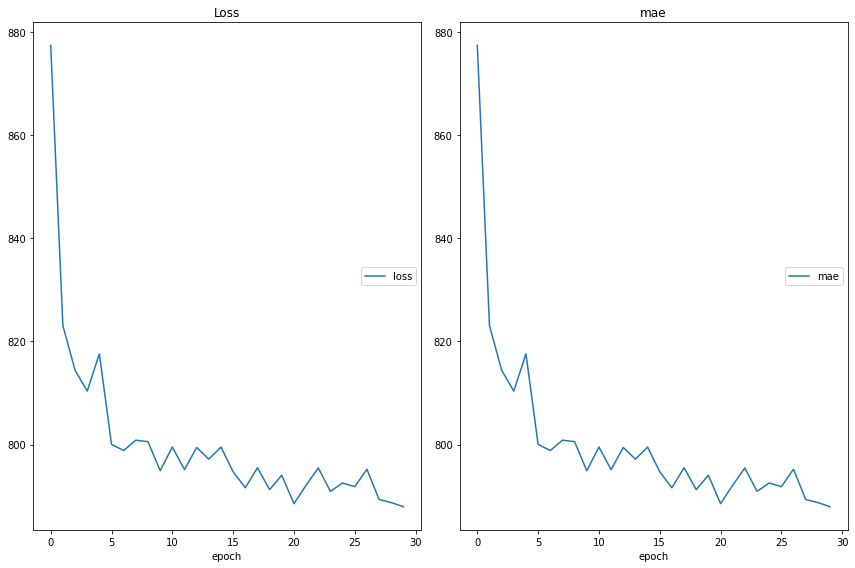

Loss
	loss             	 (min:  787.946, max:  877.406, cur:  787.946)
mae
	mae              	 (min:  787.946, max:  877.406, cur:  787.946)
476/476 [==============================] - 5s 11ms/step - loss: 787.9457 - mae: 787.9457


In [ ]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model = tf.keras.Sequential([
  tf.keras.layers.Dense(500),
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.GaussianNoise(0.8), 
  tf.keras.layers.Dense(300),  
  tf.keras.layers.Dense(150),
  tf.keras.layers.GaussianNoise(0.7), 
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(70),
  tf.keras.layers.GaussianNoise(0.6),
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

callbacks = [PlotLossesCallback()]
#, chkpt, early_stopping]

history = model.fit(x_train, y_train, epochs=30,
    callbacks=callbacks)

##Machine Learning

###Standardize

In [ ]:
df_train_standardized = st.fit_transform(x_train)
df_test_standardized = st.fit_transform(x_test)

In [ ]:
df_train_final = pd.DataFrame(df_train,columns = x_train.columns)
df_test_final = pd.DataFrame(df_test,columns=df_test.columns)

In [ ]:
df_test_final.head(0)

,CarrierRate,DeliveryDays,Distance,ShipmentWeight,ShipFromCity_50127,ShipFromCity_84060 / OMIGNANO SCALO (SA),ShipFromCity_ADRO,ShipFromCity_AGLIANA,ShipFromCity_AGRATE BRIANZA,ShipFromCity_AGRATE BRIANZA MB,ShipFromCity_ALBANO S. ALESSANDRO,ShipFromCity_ALBANO SANT'ALESSANDRO,ShipFromCity_ALBANO SANT'ALESSIO,ShipFromCity_ALBAVILLA (CO),ShipFromCity_ALBERONE DI CENTO,ShipFromCity_ALBIANO MAGRA,ShipFromCity_ALBIANO MAGRA (MASSA),ShipFromCity_ALBIANO MAGRA (MS),ShipFromCity_ALBIGNASEGO,ShipFromCity_ALBINIA,ShipFromCity_ALCESTER WARWICK,ShipFromCity_ALMENNO SAN SALVATORE,ShipFromCity_ALMENNO SAN SALVATORE (BG),ShipFromCity_ALMISANO DI LONIGO VI,ShipFromCity_ALPIGNANO,ShipFromCity_ALPIGNANO (TO),ShipFromCity_ALPIGNANO (TO9,ShipFromCity_ALPIGNANO TORINO,ShipFromCity_ALTAVILLA VICENTINA - VI,ShipFromCity_ALZATE BRIANZA,ShipFromCity_ALZATE BRIANZA (CO),ShipFromCity_ALZATE BRIANZA (COMO),ShipFromCity_AMSTERDAM,ShipFromCity_ANCHIANO,ShipFromCity_ANCONA,ShipFromCity_ANTELLA,ShipFromCity_ANTELLA - BAGNO A RIPOLI (FI),ShipFromCity_ANTELLA BAGNO A RIPOLI FIRENZE,ShipFromCity_ARCOLA,ShipFromCity_ARCOLA (LA SPEZIA),ShipFromCity_ARCOLA SP,ShipFromCity_ARCORE,ShipFromCity_ARCORE (MI),ShipFromCity_ARESE,ShipFromCity_ARESE MI,ShipFromCity_AREZZO,ShipFromCity_ARICESTII-RAHTIVANI,ShipFromCity_ARLUNO MI,ShipFromCity_ARPAJON,ShipFromCity_ARSAGO SEPRIO (VA),ShipFromCity_ARTOGNE,ShipFromCity_ARZANO,ShipFromCity_ARZANO (NA),ShipFromCity_ARZANO NAPOLI,ShipFromCity_ARZIGNANO,ShipFromCity_ASSAGO,ShipFromCity_ASSISI,ShipFromCity_ASSISI PERUGIA,ShipFromCity_AVENZA,ShipFromCity_AVEZZANO,ShipFromCity_AVIGLIANA TO,ShipFromCity_BAD WÜNNENBERG,ShipFromCity_BADIA A SETTIMO,ShipFromCity_BAGNATICA,ShipFromCity_BAGNO A RIPOLI,ShipFromCity_BAGNO A RIPOLI (FI),ShipFromCity_BAGNO A RIPOLI FI,ShipFromCity_BARBERINO DI MUGELLO,ShipFromCity_BARBERINO TAVARNELLE,ShipFromCity_BARBERINO VAL DELSA,ShipFromCity_BARI,ShipFromCity_BASALDELLA DI CAMPFORMIO,ShipFromCity_BASALDELLA DI CAMPOFORMID,ShipFromCity_BASALDELLA DI CAMPOFORMIDO (UD,ShipFromCity_BASALUZZO,ShipFromCity_BASIANO,ShipFromCity_BASTIA DI ROVOLON,ShipFromCity_BERGAMO,ShipFromCity_BERNATE,ShipFromCity_BIANCONESE DI FONTEVIVO (PR),ShipFromCity_BIASSONO,ShipFromCity_BIASSONO MB,ShipFromCity_BIBBIENA,ShipFromCity_BIBBIENA STAZIONE,ShipFromCity_BOLOGNA,ShipFromCity_BORGO A MOZZANO,ShipFromCity_BORGO A MOZZANO (LU),ShipFromCity_BORGOMANERO,ShipFromCity_BORROMEO,ShipFromCity_BREGNANO,ShipFromCity_BRESCIA,ShipFromCity_BRINDISI,ShipFromCity_BS,ShipFromCity_BUCAREST,ShipFromCity_BUCCINASCO,ShipFromCity_BUCURESTI,ShipFromCity_BURAGO DI MOLGORA,ShipFromCity_CALCINATE,ShipFromCity_CALDERARA DI RENO,ShipFromCity_CALENZANO,ShipFromCity_CALENZANO (FI),ShipFromCity_CALENZANO FI,ShipFromCity_CAMBIAGO,ShipFromCity_CAMERATA PICENA,ShipFromCity_CAMPI BISENZIO,ShipFromCity_CAMPI BISENZIO (FI),ShipFromCity_CAMPOGAGLIANO (MODENA),ShipFromCity_CAMPONOGARA,ShipFromCity_CANEGRATE,ShipFromCity_CANEGRATE (MI),ShipFromCity_CANZO,ShipFromCity_CAPONAGO,ShipFromCity_CARDANO AL CAMPO,ShipFromCity_CARDANO AL CAMPO VA,ShipFromCity_CARIMATE (CO),ShipFromCity_CARLISLE,ShipFromCity_CARPANETO PIACENTINO (PC),ShipFromCity_CARPI,ShipFromCity_CARPI-MO,ShipFromCity_CARRARA,ShipFromCity_CARRARA AVENZA,ShipFromCity_CARRARA AVENZA MS,ShipFromCity_CASALE SUL SILE,ShipFromCity_CASAVATORE,ShipFromCity_CASAVATORE / NA,...,ShipToCity_PRATO,ShipToCity_PRIOLO GARGALLO,ShipToCity_PRIOLO GARGALLO - SR,ShipToCity_PTUJ,ShipToCity_QUARTO PC,ShipToCity_RADICONDOLI (SI),ShipToCity_RAGUSA,ShipToCity_RAVENNA,ShipToCity_REGGELLO,ShipToCity_REGGELLO (FI),ShipToCity_REGGIO EMILIA,ShipToCity_RESCALDINA MI,ShipToCity_RIPALTA CREMASCA,ShipToCity_RIVOLI,ShipToCity_RODANO,ShipToCity_RONCELLO,ShipToCity_RONCELLO ( MI),ShipToCity_RONCELLO - MILANO,ShipToCity_RONCELLO MB,ShipToCity_ROSIGNANO,ShipToCity_ROSIGNANO MARITTIMO,ShipToCity_ROSIGNANO SOLVAY,ShipToCity_ROSIGNANO SOLVAY LI,ShipToCity_ROTTOFRENO FRAZ. SAN NICOLÒ (P,ShipToCity_ROVIGO,ShipToCity_RUBBIANO DI SOLIGNANO (PR),ShipToCity_

In [ ]:
df_test_final = df_test_final.iloc[: , 1:]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

###Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df_train_final, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_pred

array([ 482.13666667, 1049.34333333,  963.44      , ...,  352.54666667,
       1811.85      , 1688.43452381])

In [ ]:
y_test.shape

(3802,)

In [ ]:
y_pred.shape

(3802,)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 414.4353480542619
Mean Squared Error: 2318420.2090310697
Root Mean Squared Error: 1522.6359410676832


In [ ]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).head(20)

,Actual,Predicted
1928,500.0,482.136667
8506,900.0,1049.343333
2959,1750.0,963.440000
2998,570.0,513.376667
18988,470.0,474.570000
14966,350.0,751.310000
5808,244.0,234.846667
13021,1000.0,821.203333
8130,150.0,228.628095
14741,150.0,227.153333


In [ ]:
Y_prediction_rf = abs(rf.predict(df_test_final))

In [ ]:
Y_prediction_rf


array([ 482.13666667, 1049.34333333,  963.44      , ...,  352.54666667,
       1811.85      , 1688.43452381])

In [ ]:
Y_pred = []

for i in Y_prediction_rf:
    Y_pred.append(round(float(i),2))

In [ ]:
def log1p(vec):
    return np.log1p(abs(vec))

def expm1(x):
    return np.expm1(x)

In [ ]:
df_submission = pd.DataFrame()
#df_submission["ID"] = df_test_copy["ID"]
df_submission["CarrierRate"] = Y_pred
Y_pred = expm1(Y_pred)

In [ ]:
df_submission.to_csv("submission_rf_basic.csv")

###Random Search Forest

In [ ]:
param_grid = [
{'n_estimators': [50,100,250,500], 
 'max_depth': [10, 50, 100], 'bootstrap': [True, False]}
]

In [ ]:
random_search_forest = RandomizedSearchCV(rf, param_grid, cv=10)

In [ ]:
random_search_forest.fit(df_train_final, y_train)

KeyboardInterrupt: ignored

In [ ]:
tuned_rf_best_random = random_search_forest.best_estimator_

In [ ]:
tuned_rf_best_random

In [ ]:
tuned_rf_best_random.fit(df_train_final, y_train)

In [ ]:
tuned_rf_random_pred = abs(tuned_rf_best_random.predict(df_test_final))

In [ ]:
# tuned_rf_random_pred = rf.predict(x_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tuned_rf_random_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tuned_rf_random_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tuned_rf_random_pred)))

In [ ]:
pd.DataFrame({'Actual':y_test,'Predicted':tuned_rf_random_pred}).head(20)

###LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)
y_test_pred_lgbm = lgbm.predict(x_test)
#y_test_pred_lgbm2 = expm1(y_test_pred_lgbm)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_lgbm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_lgbm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lgbm)))

Mean Absolute Error: 546.7949914257515
Mean Squared Error: 4438504.833192551
Root Mean Squared Error: 2106.77593331435


In [ ]:
pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred_lgbm}).head(20)

,Actual,Predicted
1928,500.0,423.556708
8506,900.0,962.607987
2959,1750.0,1222.897014
2998,570.0,656.870163
18988,470.0,1205.490010
14966,350.0,788.233120
5808,244.0,243.138270
13021,1000.0,1942.231747
8130,150.0,246.790386
14741,150.0,408.119898


###Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(model.intercept_)

20911127538.662865


In [ ]:
print(model.coef_)

[ 9.29802651e+01  2.19298268e+00  1.06657301e-01 ...  4.66300266e+10
  1.55535419e+10 -2.25894696e+10]


In [ ]:
list(zip(df_train.columns,model.coef_))

[('CarrierRate', 92.98026509251983),
 ('DeliveryDays', 2.192982681107147),
 ('Distance', 0.10665730074910407),
 ('ShipmentWeight', -4100709260.988006),
 ('ShipFromCity_50127', -4100709244.6026697),
 ('ShipFromCity_84060 / OMIGNANO SCALO (SA)', -4100708836.35835),
 ('ShipFromCity_ADRO', -4100708572.6457524),
 ('ShipFromCity_AGLIANA', -4100709440.986782),
 ('ShipFromCity_AGRATE BRIANZA', -4100709199.146459),
 ('ShipFromCity_AGRATE BRIANZA MB', -4100709455.426386),
 ('ShipFromCity_ALBANO S. ALESSANDRO', -4100709282.816515),
 ("ShipFromCity_ALBANO SANT'ALESSANDRO", -4100708949.8421154),
 ("ShipFromCity_ALBANO SANT'ALESSIO", -4100708886.181537),
 ('ShipFromCity_ALBAVILLA (CO)', -4100709200.5802617),
 ('ShipFromCity_ALBERONE DI CENTO', -4100708672.2050943),
 ('ShipFromCity_ALBIANO MAGRA', -4100708712.807536),
 ('ShipFromCity_ALBIANO MAGRA (MASSA)', -4100708782.277969),
 ('ShipFromCity_ALBIANO MAGRA (MS)', -4100709438.1245546),
 ('ShipFromCity_ALBIGNASEGO', -4100709245.794953),
 ('ShipFromCit

In [ ]:
y_pred_linear=model.predict(x_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))

Mean Absolute Error: 133586410.72295111
Mean Squared Error: 6.337040529189179e+18
Root Mean Squared Error: 2517347915.8013062


In [ ]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred_linear}).head(20)

,Actual,Predicted
1928,500.0,-87.909203
8506,900.0,1016.127285
2959,1750.0,586.772041
2998,570.0,800.311966
18988,470.0,324.604259
14966,350.0,512.972912
5808,244.0,127.430702
13021,1000.0,874.968525
8130,150.0,252.235039
14741,150.0,938.237648
